Taller 2: Uso de Algoritmos de ML

Nombre: Marco Yesid Cardozo Yepes

Cédula: 1001283581

**Pasos para la solución de los ejercicios**



1.   Escoger un data set que que tenga datos de manera numerica o que sea facil su conversión a datos numericos. (Algoritmo de ML como Kmeans o Kvecino funcionan con datos numericos)
2.  Hace un análisis previo para entender el comportamiento de los datos.
3. Si es necesario se puede construir un data set para la realización del taller. (Este nuevo data set contiene los datos cargados desde el portal de datos.gov)
4. Identificar X=[ 'datos de entrada' ] e y=['datos de salida' ]
5. Hacer la división de los datos. Utilizar el split() ***train_test_split***
6. Implementar el modelo (clasificación o agrupamiento). Verifique los datos de entrada y los datos de salida. Recuerde que para la clasificación de Kvecinos se necesitan etiquetas
7. Revisar el score o la metrica de rendimiento.
8. Hacer el análisis de los resultados


NOTA: poder usar data set que no esten en el portal, tambien es valido


In [224]:
!pip install sodapy

In [225]:
#Punto 1
#Clasificación
#Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("u8ud-84pb")
df=pd.DataFrame.from_records(result)
df.head()


,tipoentidad,nombre_tipo_entidad,codigoentidad,nombreentidad,fechacorte,unicap,descrip_uc,renglon,_1_tipo_de_persona,_2_sexo,_3_tama_o_de_empresa,_4_tipo_de_cr_dito,_5_tipo_de_garant_a,_6_producto_de_cr_dito,_7_plazo_de_cr_dito,_8_tasa_efectiva_promedio,_9_margen_adicional_a_la,_10_montos_desembolsados,_11_n_mero_de_cr_ditos
0,1,BC-ESTABLECIMIENTO BANCARIO,58,Coopcentral,2022-09-30T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,33,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Avances en efectivo,23.36,N/A,154210000,275
1,1,BC-ESTABLECIMIENTO BANCARIO,6,Itau,2023-03-03T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,52,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a más de 36 meses,23.93,N/A,536806907,45
2,1,BC-ESTABLECIMIENTO BANCARIO,54,Bancoomeva,2022-07-08T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,22,Natural,Femenino,No aplica,Consumo,Sin Garantia,Libre inversión,Más de 1 año y hasta 3 años,20.13,N/A,16209600,2
3,1,BC-ESTABLECIMIENTO BANCARIO,13,BBVA Colombia,2022-09-09T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,40,Juridica,No aplica,Mediana empresa,Comercial ordinario,Garantía idónea o no idónea,Empresarial,Hasta 30 días,13.43,N/A,1400000000,1
4,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,2022-11-04T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,190,Juridica,No aplica,Gran empresa,Comercial ordinario,Garantía idónea o no idónea,Empresarial,Más de 30 días y hasta 1 año,17.79,N/A,17813230478,135


In [226]:
#Realice las tareas de limpieza necesarias
#Verificar los datos desde el data Set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tipoentidad                1000 non-null   object
 1   nombre_tipo_entidad        1000 non-null   object
 2   codigoentidad              1000 non-null   object
 3   nombreentidad              1000 non-null   object
 4   fechacorte                 1000 non-null   object
 5   unicap                     1000 non-null   object
 6   descrip_uc                 1000 non-null   object
 7   renglon                    1000 non-null   object
 8   _1_tipo_de_persona         1000 non-null   object
 9   _2_sexo                    1000 non-null   object
 10  _3_tama_o_de_empresa       1000 non-null   object
 11  _4_tipo_de_cr_dito         1000 non-null   object
 12  _5_tipo_de_garant_a        1000 non-null   object
 13  _6_producto_de_cr_dito     1000 non-null   object
 14  _7_plazo_

In [227]:
df.describe()

,tipoentidad,nombre_tipo_entidad,codigoentidad,nombreentidad,fechacorte,unicap,descrip_uc,renglon,_1_tipo_de_persona,_2_sexo,_3_tama_o_de_empresa,_4_tipo_de_cr_dito,_5_tipo_de_garant_a,_6_producto_de_cr_dito,_7_plazo_de_cr_dito,_8_tasa_efectiva_promedio,_9_margen_adicional_a_la,_10_montos_desembolsados,_11_n_mero_de_cr_ditos
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1,27,27,39,1,1,318,2,3,5,7,4,45,23,799,29,941,354
top,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,2022-09-30T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,15,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Más de 1 año y hasta 3 años,0,N/A,300000000,1
freq,1000,1000,179,179,34,1000,1000,15,702,352,513,431,547,114,162,18,947,7,212


In [228]:
#se visualizan todas las columanas de un Data Frame
pd.options.display.max_columns = None

In [229]:
df


,tipoentidad,nombre_tipo_entidad,codigoentidad,nombreentidad,fechacorte,unicap,descrip_uc,renglon,_1_tipo_de_persona,_2_sexo,_3_tama_o_de_empresa,_4_tipo_de_cr_dito,_5_tipo_de_garant_a,_6_producto_de_cr_dito,_7_plazo_de_cr_dito,_8_tasa_efectiva_promedio,_9_margen_adicional_a_la,_10_montos_desembolsados,_11_n_mero_de_cr_ditos
0,1,BC-ESTABLECIMIENTO BANCARIO,58,Coopcentral,2022-09-30T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,33,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Avances en efectivo,23.36,N/A,154210000,275
1,1,BC-ESTABLECIMIENTO BANCARIO,6,Itau,2023-03-03T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,52,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a más de 36 meses,23.93,N/A,536806907,45
2,1,BC-ESTABLECIMIENTO BANCARIO,54,Bancoomeva,2022-07-08T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,22,Natural,Femenino,No aplica,Consumo,Sin Garantia,Libre inversión,Más de 1 año y hasta 3 años,20.13,N/A,16209600,2
3,1,BC-ESTABLECIMIENTO BANCARIO,13,BBVA Colombia,2022-09-09T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,40,Juridica,No aplica,Mediana empresa,Comercial ordinario,Garantía idónea o no idónea,Empresarial,Hasta 30 días,13.43,N/A,1400000000,1
4,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,2022-11-04T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,190,Juridica,No aplica,Gran empresa,Comercial ordinario,Garantía idónea o no idónea,Empresarial,Más de 30 días y hasta 1 año,17.79,N/A,17813230478,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,BC-ESTABLECIMIENTO BANCARIO,30,Banco Caja Social S.A.,2023-02-24T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,177,Juridica,No aplica,Gran empresa,Comercial ordinario,Sin Garantia,Tarjeta de crédito empresarial,Consumos entre 7 y 12 meses,42.24,N/A,1300000,3
996,1,BC-ESTABLECIMIENTO BANCARIO,2,Banco Popular,2022-09-30T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,53,Natural,Masculino,No aplica,Consumo,Sin Garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 7 y 12 meses,33.52,N/A,303007468.61,741
997,1,BC-ESTABLECIMIENTO BANCARIO,6,Itau,2022-10-21T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,56,Natural,Masculino,No aplica,Consumo,Sin Garantia,Libre inversión,Más de 1 año y hasta 3 años,26.01,N/A,45000000,5
998,1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,2022-10-14T00:00:00.000,1,TASAS DE INTERESES ACTIVAS,166,Juridica,No aplica,Microempresa,Comercial ordinario,Sin Garantia,Empresarial,Más de 5 años y hasta 7 años,16.82,N/A,409524000,3


In [230]:
#análisis previo de los datos
codigo_e=list(df['codigoentidad'])
for i in codigo_e:
  print(i)

58
6
54
13
7
7
54
43
54
7
6
7
56
7
7
43
7
39
12
13
67
13
23
7
57
1
7
60
7
57
7
1
54
49
1
23
39
49
30
1
30
7
62
7
30
7
6
7
1
6
6
56
23
43
2
13
23
7
54
7
49
7
59
43
59
13
67
2
43
13
23
58
30
7
62
39
39
60
23
1
42
13
55
58
57
13
23
30
1
30
39
7
13
13
7
55
53
1
6
7
7
12
42
7
6
55
23
52
12
13
43
42
60
49
55
62
39
6
59
1
55
43
7
7
2
7
2
13
13
55
56
39
7
1
55
43
56
30
39
7
7
63
54
13
39
42
43
23
57
43
13
54
49
13
57
39
54
63
43
30
7
1
7
56
7
39
54
1
6
57
39
43
2
57
39
30
67
6
60
7
7
1
2
60
43
23
1
13
1
23
1
56
7
62
56
13
1
12
7
39
53
23
7
7
7
7
49
55
39
57
57
2
7
23
6
7
39
1
58
13
49
7
7
6
1
43
30
30
1
65
52
51
13
7
30
7
7
59
42
54
1
7
13
1
55
63
1
54
52
54
12
54
43
7
57
6
7
39
39
43
7
49
7
6
59
30
39
49
12
39
57
63
51
7
1
7
7
54
59
42
30
43
39
7
43
30
53
23
23
30
1
30
43
43
30
13
43
52
7
57
57
23
6
1
39
12
7
7
55
7
42
1
12
55
7
13
7
7
43
54
30
57
57
62
39
39
56
13
43
7
57
39
53
1
39
6
1
1
13
42
30
7
39
30
13
67
39
1
43
13
6
7
63
30
63
6
57
1
43
7
1
39
23
1
43
6
54
43
63
23
13
55
43
12
7
7
13

In [231]:
#Numero de créditos
num_cre=list(df['_11_n_mero_de_cr_ditos'])
for i in num_cre:
  print(i)

275
45
2
1
135
12
41
32
27
458
2
1
3706
4
7
37
1764
1
1
86
85
3
1
2
31
1
2
1
71
1
61191
1
86
3
1
1
1
10
3
3
1
8
2
12
1
20006
4
250
1
13465
1
193
7
1
1395
1
2215
732
1
63
2
6
113
84
8
2213
44
1963
1
226
18
2
487
4
614
1114
97
767
653
6
1
4
1
1
260
3
5
2
1
2
1
367
199
133237
35256
166
1
3
1
2
49
14
1
160
13
1201
103
1
6937
61
1
2012
183
342
581
2
9
1
561
2
513
1396
1
4
14473
115
8
28
8
11
14141
1
6530
12
668
20
4131
25
46930
1132
2
96
23
823
4
18
99
10
159
3
2
1
2
38
1
1
1
911
1
128
523
14
8
606
7
122
29
69
7534
1
1
7
7
1
101
1
6
1
5
12
9
4432
1
3
48
44
98
8
1
2
1341
404
1
17
28543
32
3
37
118
28159
2
628
1360
4
4
4
8108
575
7
1
3
14
2
1
1337
1
50
7
8
6845
27
223
89
2
8
10
2
7
199
48
547
4
3
13
27
2
828
415
3
1
1
2052
3
15599
731
9550
11
52
1
4
5
2
22
950
1
1
2
38
11
5
59
44
14
129
70
4
1717
3
1
680
1
1
1
1778
2
15
1780
7643
777
13
2
131
2
305
1
253
5
2820
3
731
2
5
9
1
497
89
1
1
2
682
20
6
13
4
3
7429
606
275
64
192
4965
22
67
31
3145
1
6
1
91
6
3
1
1
1
3
2
796
3
415
82
2
4
37
5
19
36


In [232]:
type(num_cre[0])

str

In [233]:
float(num_cre[0])

275.0

In [234]:
num_mont=list(df['_10_montos_desembolsados'])

tasa_efect=list(df['_8_tasa_efectiva_promedio'])

In [235]:
#Extraer los años de las fechas de corte de los creditos de cada entidad para construir la clasificacion del dataframe
import pandas as pd
fechas=list(df['fechacorte'])
df_1 = pd.DataFrame({'Fecha': fechas})
df_1['Año'] = pd.to_datetime(df_1['Fecha']).dt.year

print(df_1['Año'])

0      2022
1      2023
2      2022
3      2022
4      2022
       ... 
995    2023
996    2022
997    2022
998    2022
999    2022
Name: Año, Length: 1000, dtype: int64


In [236]:
# Extraer y añadir la lista de Año a un nuevo dataframe con las variables del dataframe inicial
df_nuevo = pd.concat([df, df_1['Fecha'].apply(lambda x: pd.Series(pd.to_datetime(x).year))], axis=1)
df_nuevo.rename(columns={0: 'Año'}, inplace=True)
print(df_nuevo)

    tipoentidad          nombre_tipo_entidad codigoentidad  \
0             1  BC-ESTABLECIMIENTO BANCARIO            58   
1             1  BC-ESTABLECIMIENTO BANCARIO             6   
2             1  BC-ESTABLECIMIENTO BANCARIO            54   
3             1  BC-ESTABLECIMIENTO BANCARIO            13   
4             1  BC-ESTABLECIMIENTO BANCARIO             7   
..          ...                          ...           ...   
995           1  BC-ESTABLECIMIENTO BANCARIO            30   
996           1  BC-ESTABLECIMIENTO BANCARIO             2   
997           1  BC-ESTABLECIMIENTO BANCARIO             6   
998           1  BC-ESTABLECIMIENTO BANCARIO             1   
999           1  BC-ESTABLECIMIENTO BANCARIO            55   

              nombreentidad               fechacorte unicap  \
0               Coopcentral  2022-09-30T00:00:00.000      1   
1                      Itau  2023-03-03T00:00:00.000      1   
2                Bancoomeva  2022-07-08T00:00:00.000      1   
3  

In [237]:
#Construir un dataFrame para hacer la clasificación
new_df=pd.DataFrame(df_nuevo['Año'])
new_df['montos_desembolsados']=df['_10_montos_desembolsados']
new_df['numero_creditos']=df['_11_n_mero_de_cr_ditos']
new_df['tasa_interes']=df['_8_tasa_efectiva_promedio']

new_df

,Año,montos_desembolsados,numero_creditos,tasa_interes
0,2022,154210000,275,23.36
1,2023,536806907,45,23.93
2,2022,16209600,2,20.13
3,2022,1400000000,1,13.43
4,2022,17813230478,135,17.79
...,...,...,...,...
995,2023,1300000,3,42.24
996,2022,303007468.61,741,33.52
997,2022,45000000,5,26.01
998,2022,409524000,3,16.82


In [238]:
#Convertir los datos del data Frame de str a numericos solo la ultima columna
salida=pd.to_numeric(new_df['tasa_interes'], errors='coerce')
print(type(salida))
y=np.array(salida)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [239]:
#Vamos a colocar etiquetas a la salida
#El proposito es saber si un año es bueno o es malo
#Se debe estimar un umbral para estas etiquetas
#imprimr la salida
for i in y:
  print(i)

23.36
23.93
20.13
13.43
17.79
36.69
27.91
16.08
42.71
14.34
18.4
10.94
33.25
35.03
33.25
32.77
46.21
16.98
20.16
25.75
33.08
13.68
14.93
12.2
36.87
10.55
16.02
55.1
31.69
15.12
29.34
13.74
27.24
36.92
8.34
16.77
25.0
36.0
25.32
25.94
23.21
14.44
32.88
29.19
38.44
31.86
9.05
27.53
16.08
0.0
16.62
41.82
16.94
28.38
28.05
18.02
39.38
31.7
27.24
23.21
0.0
24.47
17.52
18.34
23.61
42.02
33.08
37.86
20.48
46.17
19.18
15.47
29.84
19.4
58.4
30.25
15.25
46.57
38.33
17.57
33.31
10.1
31.83
20.0
30.13
14.93
19.05
30.42
41.43
16.0
27.42
29.22
30.67
15.52
41.91
24.19
24.82
25.09
16.77
16.59
11.9
11.86
26.82
16.69
45.24
31.78
34.56
6.0
34.49
14.13
20.51
29.42
48.2
0.0
36.88
45.22
17.82
22.0
18.64
33.29
37.27
40.92
17.85
23.94
0.0
21.2
18.38
10.76
16.42
31.72
38.6
16.21
41.31
16.85
35.11
17.2
41.4
17.17
31.72
38.58
17.11
28.96
36.65
38.65
34.97
28.77
26.82
16.25
31.49
17.6
18.8
18.01
21.75
15.34
27.42
19.28
28.32
27.51
19.64
18.39
27.98
13.87
18.43
28.73
26.33
26.39
38.18
23.0
42.37
22.71
18.92
27.12
3

In [240]:
print('La media de la tasa de interés es: ',np.mean(y))

La media de la tasa de interés es:  25.948040000000002


In [241]:
#La estiquetas son de la siguiente forma:
#si el valor esta por debajo de la media es bueno y la etiqueta es 0
#si el valor esta por encima de la media es malo y la etiqueta es 1
#Colocamos las etiquetas
#salida esperada es: y_
y_=[]
for i in range(len(y)):
  if y[i]<= np.mean(y):
    y_.append(0)
  else:
    y_.append(1)

print(y_)
print('-----------------------------------------------------------------------------------------------------------------')
out=np.array(y_)
print(out)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 

In [242]:
#Se crean arreglos de numpy
col1=pd.to_numeric(new_df['Año'], errors='coerce')
col2=pd.to_numeric(new_df['montos_desembolsados'], errors='coerce')
col3=pd.to_numeric(new_df['numero_creditos'], errors='coerce')
col4=pd.to_numeric(new_df['tasa_interes'], errors='coerce')
x1=np.array(col1)
x2=np.array(col2)
x3=np.array(col3)
x4=np.array(col4)


In [243]:
#Se crea la matriz para los datos de entrada
Salida=[]
for i in range(len(col1)):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    aux.append(x4[i])
    Salida.append(aux)
X=np.array(Salida)
X

array([[2.02200000e+03, 1.54210000e+08, 2.75000000e+02, 2.33600000e+01],
       [2.02300000e+03, 5.36806907e+08, 4.50000000e+01, 2.39300000e+01],
       [2.02200000e+03, 1.62096000e+07, 2.00000000e+00, 2.01300000e+01],
       ...,
       [2.02200000e+03, 4.50000000e+07, 5.00000000e+00, 2.60100000e+01],
       [2.02200000e+03, 4.09524000e+08, 3.00000000e+00, 1.68200000e+01],
       [2.02200000e+03, 2.40630000e+05, 4.00000000e+00, 3.04600000e+01]])

In [244]:
print(X[0])
print('---------')
print(out[0])

[2.0220e+03 1.5421e+08 2.7500e+02 2.3360e+01]
---------
0


In [245]:
#Armamos el modelo. De clasificación o de agrupamiento
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,out, test_size=0.15)


In [246]:
#los datos de prueba que van para el modelo

print(X_test)
print('--------------------------')
print(y_test)

[[2.02200000e+03 5.57056230e+07 6.00000000e+00 1.94200000e+01]
 [2.02200000e+03 3.85634420e+08 6.00000000e+00 2.33400000e+01]
 [2.02200000e+03 3.13521725e+09 1.07000000e+02 1.64400000e+01]
 [2.02200000e+03 2.50000000e+08 2.00000000e+00 1.82900000e+01]
 [2.02200000e+03 5.77411379e+09 2.21000000e+02 1.75500000e+01]
 [2.02200000e+03 1.69806399e+08 7.60000000e+01 3.86700000e+01]
 [2.02300000e+03 1.24780036e+10 2.81590000e+04 4.36400000e+01]
 [2.02200000e+03 1.00000000e+07 1.00000000e+00 5.51000000e+01]
 [2.02200000e+03 7.00000000e+06 1.00000000e+00 1.67900000e+01]
 [2.02300000e+03 1.05019605e+10 9.10000000e+01 2.67200000e+01]
 [2.02200000e+03 2.63550000e+08 1.00000000e+00 1.92200000e+01]
 [2.02200000e+03 4.95815605e+08 1.00000000e+01 1.40000000e+01]
 [2.02200000e+03 3.46687089e+08 5.75000000e+02 2.70100000e+01]
 [2.02200000e+03 1.61458898e+08 6.00000000e+00 2.44700000e+01]
 [2.02200000e+03 1.30000000e+08 1.00000000e+00 1.70900000e+01]
 [2.02200000e+03 1.99579752e+09 1.40000000e+01 1.045000

In [247]:
#Los datos de entrenamiento
print(X_train)
print('--------------------------')
print(y_train)


[[2.02200000e+03 3.39869982e+09 6.80000000e+03 3.29200000e+01]
 [2.02200000e+03 9.00000000e+07 1.00000000e+00 1.19500000e+01]
 [2.02300000e+03 4.20000000e+08 1.00000000e+00 2.04400000e+01]
 ...
 [2.02200000e+03 2.40630000e+05 4.00000000e+00 3.04600000e+01]
 [2.02300000e+03 9.65785762e+08 3.00000000e+00 2.02600000e+01]
 [2.02300000e+03 4.38771276e+08 6.00000000e+00 2.11000000e+01]]
--------------------------
[1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0

In [248]:
#Modelo de clasificación
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [249]:
#Revisar la metrica
Knn.score(X_test,y_test)

0.5733333333333334

Se obtiene una precisión del 57,34%

In [250]:
#se traen nuevas observaciones
observacion=[[2024,15987654238,250,18.59],[2024,548962478412,100,27.59],[2024,69874561236,300,15.02],[2024,61236,15,26.15]]

In [251]:
#La clasificación
Knn.predict(observacion)

array([0, 1, 0, 1])

La clasificacion de las nuevas observaciones esta acorde a las etiquetas establecidas:

*  si el valor esta por debajo de la media es bueno y la etiqueta es 0
*  si el valor esta por encima de la media es malo y la etiqueta es 1


Recordando que la media de la tasa de interés es:  25.948040000000002

En general el resultado de la clasificación es bueno pese a tener un modelo con 57,34% de precisión.

In [252]:
#Punto 2
#Agrupamiento
#Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("fut2-keu8")
#Internet Fijo Penetración Municipio
df2=pd.DataFrame.from_records(result)
df2.head()

,a_o,trimestre,cod_departamento,departamento,cod_municipio,municipio,no_accesos_fijos_a_internet,poblaci_n_dane,indice
0,2021,3,15,BOYACA,15189,CIENEGA,233,4688,"0,0497"
1,2020,4,25,CUNDINAMARCA,25772,SUESCA,1313,18741,"0,0701"
2,2021,3,52,NARI�O,52036,ANCUYA,20,8601,"0,0023"
3,2021,3,68,SANTANDER,68669,SAN ANDRES,38,8691,"0,0044"
4,2021,1,25,CUNDINAMARCA,25040,ANOLAIMA,909,15156,"0,06"


In [253]:
#Información del dataSet
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   a_o                          1000 non-null   object
 1   trimestre                    1000 non-null   object
 2   cod_departamento             1000 non-null   object
 3   departamento                 1000 non-null   object
 4   cod_municipio                1000 non-null   object
 5   municipio                    1000 non-null   object
 6   no_accesos_fijos_a_internet  1000 non-null   object
 7   poblaci_n_dane               1000 non-null   object
 8   indice                       1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [254]:
df2.describe()

,a_o,trimestre,cod_departamento,departamento,cod_municipio,municipio,no_accesos_fijos_a_internet,poblaci_n_dane,indice
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,4,33,33,772,726,666,819,634
top,2021,4,15,BOYACA,15753,SOATA,10,36786,"0,0033"
freq,858,715,150,150,6,6,12,4,12


In [255]:
#Realice las tareas de limpieza necesarias
#departamentos
depar=list(df2['departamento'])
for i in depar:
  print(i)

BOYACA
CUNDINAMARCA
NARI�O
SANTANDER
CUNDINAMARCA
CALDAS
PUTUMAYO
BOYACA
PUTUMAYO
CUNDINAMARCA
AMAZONAS
VAUPES
SUCRE
BOYACA
BOLIVAR
SANTANDER
CUNDINAMARCA
AMAZONAS
META
BOYACA
AMAZONAS
NORTE DE SANTANDER
BOYACA
META
HUILA
CUNDINAMARCA
CALDAS
BOYACA
BOYACA
HUILA
GUAINIA
TOLIMA
SANTANDER
META
AMAZONAS
BOYACA
BOYACA
META
BOYACA
BOYACA
BOYACA
BOYACA
BOYACA
SUCRE
HUILA
ANTIOQUIA
VALLE DEL CAUCA
BOYACA
BOYACA
BOYACA
BOYACA
BOYACA
VAUPES
NORTE DE SANTANDER
BOYACA
CUNDINAMARCA
GUAVIARE
NORTE DE SANTANDER
CAQUETA
GUAVIARE
BOYACA
NARI�O
BOYACA
CAUCA
BOYACA
NORTE DE SANTANDER
NORTE DE SANTANDER
BOYACA
HUILA
NARI�O
CAQUETA
VICHADA
META
NARI�O
CUNDINAMARCA
ANTIOQUIA
BOYACA
VAUPES
BOYACA
CAUCA
CUNDINAMARCA
HUILA
NARI�O
CUNDINAMARCA
ANTIOQUIA
SANTANDER
NARI�O
SANTANDER
GUAINIA
CUNDINAMARCA
VICHADA
CUNDINAMARCA
SUCRE
CUNDINAMARCA
GUAVIARE
CUNDINAMARCA
VAUPES
CAUCA
GUAVIARE
NARI�O
NARI�O
VICHADA
VALLE DEL CAUCA
NORTE DE SANTANDER
BOYACA
CAUCA
CUNDINAMARCA
BOYACA
GUAINIA
AMAZONAS
CUNDINAMARCA
CUNDINAMAR

In [256]:
#Analisis del Data Set
df2['departamento']

0               BOYACA
1         CUNDINAMARCA
2               NARI�O
3            SANTANDER
4         CUNDINAMARCA
            ...       
995              HUILA
996    VALLE DEL CAUCA
997          ANTIOQUIA
998          SANTANDER
999          SANTANDER
Name: departamento, Length: 1000, dtype: object

In [257]:
#se usa el oneHotEncoder para transformar los departamentos de variables categoricas en
#representación numerica
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
pro=list(df2['departamento'])
pro_n=np.array(pro)
pro_c=pro_n.reshape(-1,1)
pro_=encoder.fit_transform(pro_c)
print(pro_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [258]:
#Probar la codificación
print(pro_[0], pro[0])
print(pro_[3], pro[3])
print(pro_[1], pro[1])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.] BOYACA
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.] SANTANDER
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.] CUNDINAMARCA


In [259]:
print(len(pro_[0]))

33


In [260]:
def contar(n, vec):
  '''Para esta funcion n es el numero a contar y vec es la lista donde contar '''
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

In [261]:
#
cp=[]#Nuemro de veces que aparece el departamento
dic_O={}#El dicionario tiene clave el nombre del departamento y como valor las veces que se repite
for i in range(len(pro)):
  dic_O[pro[i]]=contar(pro[i],pro)
print(dic_O)

{'BOYACA': 150, 'CUNDINAMARCA': 90, 'NARI�O': 71, 'SANTANDER': 82, 'CALDAS': 16, 'PUTUMAYO': 14, 'AMAZONAS': 17, 'VAUPES': 7, 'SUCRE': 16, 'BOLIVAR': 33, 'META': 34, 'NORTE DE SANTANDER': 35, 'HUILA': 32, 'GUAINIA': 11, 'TOLIMA': 48, 'ANTIOQUIA': 93, 'VALLE DEL CAUCA': 36, 'GUAVIARE': 6, 'CAQUETA': 18, 'CAUCA': 35, 'VICHADA': 8, 'SAN ANDRES Y PROVIDENCIA': 3, 'CORDOBA': 19, 'CASANARE': 19, 'LA GUAJIRA': 6, 'MAGDALENA': 18, 'ARAUCA': 8, 'CHOCO': 24, 'CESAR': 19, 'QUINDIO': 8, 'RISARALDA': 8, 'ATLANTICO': 13, 'BOGOTA': 3}


In [262]:
#Los nombres de los departamentos
for nom, valor in enumerate(dic_O):
  print(nom, valor)

0 BOYACA
1 CUNDINAMARCA
2 NARI�O
3 SANTANDER
4 CALDAS
5 PUTUMAYO
6 AMAZONAS
7 VAUPES
8 SUCRE
9 BOLIVAR
10 META
11 NORTE DE SANTANDER
12 HUILA
13 GUAINIA
14 TOLIMA
15 ANTIOQUIA
16 VALLE DEL CAUCA
17 GUAVIARE
18 CAQUETA
19 CAUCA
20 VICHADA
21 SAN ANDRES Y PROVIDENCIA
22 CORDOBA
23 CASANARE
24 LA GUAJIRA
25 MAGDALENA
26 ARAUCA
27 CHOCO
28 CESAR
29 QUINDIO
30 RISARALDA
31 ATLANTICO
32 BOGOTA


In [263]:
#Utilizar pandas para agrupar
#datosV.pivot_table(values='cantidad', index='departamento', columns=['zona'], aggfunc='count')
df2.pivot_table(values='a_o', index='departamento', columns=['no_accesos_fijos_a_internet'], aggfunc='count')

no_accesos_fijos_a_internet,1,10,100,1000,1004,1009,1016,102,103,1034,104,1047,106,1060,1064,10665,1068,107,10730,107451,108,108271,1087,1099,11,1104,1108,111,112,11200,1123,1124,1127,113,1130,11304,11316,1139,1141,1142,11480,1149,115,116,1165,117,117548,1177,1178,1179,118,1186,1190,1196,12,120,122,1223,122627,12297,1233,1241,1242,125,1254,1256,126,1262,1267,1268,12688,128,1286,129,1290,1292,13,130,13053,1313,132,13230,13256,13293,1333,134,1341,1352,135324,1357,1358,137,138,139,1391,14,140,1409,142,143,1438,143869,144,1458,146,1466,1468,147,1472,1478,1485,149,1490,1491,15,150,151,1511,1514,152,153,15402,1542,1545,155,1552,15542,156,1568,157,1574,1575,158,16,160,162,1620,1624,163,1636,16363,164,164267,1648,16508,16531,16536,1662,16660,167,1670,168,169,1697,17,172,1722,1735,174,1741,17430,175,1755,1757,177,178,1789,179,18,180,1804,181,182,1827,1834,184,185,18566,186,187,1871,1872,189,1893,18952,19,1906,191,192,1921,19238,193,1939,195,1957333,197,19762,198,2,20,200,201,2017,2025140,20254,203,205,2056,2069115,207,2080,209,2091,20920,21,210,211,21220,2128,2149,215,2153,21557,21572,216,217,218,2192,22,220,2214,2216,22178,22204,223,2230,22394,2243,2244,225,2254,226,2262,2269,227,2282,23,230,2309,231,232,2322,233,23377,234,235,236,2398,24,240,241,24102,242,244,246,24612,2474,249,25,251,2513,252,2540,255,2564,2569,25712,2576,2581,2586,26,260,2603,261,2611,2625,263,26324,2647,265,266,268,26863,269,2697,27,272,273,2730,274,27419,27444,2745,276,277,2774,28,28045,28183,283,2842,286,287,288,29,290,291,292,2932,294,295,29722,299,2991,2995,3,30,300,301,302,304,307,3071,309,31,310,311,313,3134,314,316,317,3171,3189,32,320,3208,321,322,32279,3228,3239,325,327,328,329,3292,33,332,334,3349,335,336,34,342,34220,344,3450,346,349,35,350,351,3521,3525,353,3550,356,359,36,360,363,3639,364,36466,3657,366,367,368,369,37,370,371,373,3760,37788,3796,38,380,3806,385,386,3860,3867,387,388,3885,3890,39,3911,39341,397,398,39854,3990,4,40,400,40061,4011,402,40382,404,4041,405,407,40811,409,4094,41,412,4139,4152,41598,418,419,42,4209,4226,423,424,4254,42895,43,432,433,434,4341,436,4373,43947,44,440,441,442,444,446,448,45,450,451,454,4560,45685,457,4576,458,459,4597,46,4608,465,469,47,472,479,48,480,4804,4825,4847,4858,486,487,489,491,494,4948,4958,496,49636,497,5,50,503,5032,5039,504,5071,5074,509,51,512,52,5226,524,527,53,5308,532,5333,5341,535,537,54,543061,544,5490,55,550,554,5575,5585,56,560,561,5638,564,566,567,569,57,5744,575,577,58,584,5844,585,586,589,59,59357,595,598,6,6010,602,6078,61,6160,617,62,6235,62604,63,630,633,635,638,63828,64,6404,6453,655541,66,6620,665,666,667,668,67,671,6742,6754,677,68,680,686,687,688,689,69,690,7,70,7095,713,716,717,719,73,74,74249,743,747,75,751,754,7550,7582,76,77,7719,777,778,78,785,786,7875,793,79449,8,80,806,8086,81,81038,81064,812,8182,821,8268,83,83288,834,8350,84,85,8503,851,853,854,859,86,860,861,862,8625,870,879,88,887,889,89,9,90,900,90264,909,915,916,93,934,940,9481,9510,959,96,97,97279,974,98,980,9811,99
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AMAZONAS,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [264]:
df2.pivot_table(values='poblaci_n_dane', index='departamento', columns=['trimestre'], aggfunc='count')

trimestre,1,2,3,4
departamento,,,,
AMAZONAS,1.0,NaN,9.0,7.0
ANTIOQUIA,NaN,5.0,6.0,82.0
ARAUCA,NaN,NaN,2.0,6.0
ATLANTICO,NaN,NaN,NaN,13.0
BOGOTA,1.0,1.0,1.0,NaN
BOLIVAR,2.0,1.0,2.0,28.0
BOYACA,8.0,8.0,39.0,95.0
CALDAS,1.0,NaN,1.0,14.0
CAQUETA,1.0,1.0,4.0,12.0


In [265]:
df2.pivot_table(values='indice', index='departamento', columns=['trimestre'], aggfunc='sum')

trimestre,1,2,3,4
departamento,,,,
AMAZONAS,"0,0003",NaN,"0,00050,00190,00330,00530,02330,00130,00380,02...","0,0030,00330,00340,00910,00130,00050,0019"
ANTIOQUIA,NaN,"0,09360,12270,07710,25880,1271","0,07970,32560,04070,12720,04430,0743","0,0970,0790,27370,09120,07250,14980,07690,1218..."
ARAUCA,NaN,NaN,"0,0870,0531","0,05710,08280,1130,03370,08560,0967"
ATLANTICO,NaN,NaN,NaN,"0,05970,0170,11540,01210,02150,07310,02160,093..."
BOGOTA,"0,2528","0,2615","0,2672",NaN
BOLIVAR,"0,04890,0175","0,0345","0,06890,0038","0,02120,03490,03750,0440,00440,01210,02130,023..."
BOYACA,"0,04090,08840,02850,06730,00690,00980,02950,024","0,03720,07660,04090,01290,08460,09130,23150,0051","0,04970,01960,00730,00280,01960,00370,00620,06...","0,02020,01510,02150,09640,02360,040,02020,0898..."
CALDAS,"0,0699",NaN,"0,1285","0,1450,02170,04820,04920,08730,0320,01010,1173..."
CAQUETA,"0,0077","0,0431","0,00070,02540,08580,0055","0,00080,03280,08610,15060,00630,00930,00360,05..."


In [266]:
#Covertir la información del data set en información numerica
a=list(df2['a_o'])
for i in range(len(a)):
  a[i]=int(a[i])

an=np.array(a)

t=list(df2['trimestre'])
for i in range(len(t)):
  t[i]=int(t[i])

tn=np.array(t)

ab=list(df2['no_accesos_fijos_a_internet'])
for i in range(len(ab)):
  ab[i]=int(ab[i])
abn=np.array(ab)


In [267]:
df2.head(1)

,a_o,trimestre,cod_departamento,departamento,cod_municipio,municipio,no_accesos_fijos_a_internet,poblaci_n_dane,indice
0,2021,3,15,BOYACA,15189,CIENEGA,233,4688,"0,0497"


In [268]:
new_df2=pd.DataFrame(an)
new_df2['Año']=an
new_df2['Trimestre']=tn
new_df2['Departamento']=df2['departamento']
new_df2['Municipio']=df2['municipio']
new_df2['Accesos_fijos_internet']=df2['no_accesos_fijos_a_internet']
new_df2['Población']=df2['poblaci_n_dane']
new_df2['Índice_penetración_internet']=df2['indice']
new_df2

,0,Año,Trimestre,Departamento,Municipio,Accesos_fijos_internet,Población,Índice_penetración_internet
0,2021,2021,3,BOYACA,CIENEGA,233,4688,"0,0497"
1,2020,2020,4,CUNDINAMARCA,SUESCA,1313,18741,"0,0701"
2,2021,2021,3,NARI�O,ANCUYA,20,8601,"0,0023"
3,2021,2021,3,SANTANDER,SAN ANDRES,38,8691,"0,0044"
4,2021,2021,1,CUNDINAMARCA,ANOLAIMA,909,15156,"0,06"
...,...,...,...,...,...,...,...,...
995,2021,2021,4,HUILA,ACEVEDO,2932,25510,"0,1149"
996,2021,2021,4,VALLE DEL CAUCA,ANSERMANUEVO,1789,17409,"0,1028"
997,2021,2021,4,ANTIOQUIA,PUERTO NARE,1130,14664,"0,0771"
998,2021,2021,4,SANTANDER,GALAN,10,2923,"0,0034"


In [269]:
new_df2.pivot_table(values='Año', index='Departamento', columns=['Trimestre'], aggfunc='count')

Trimestre,1,2,3,4
Departamento,,,,
AMAZONAS,1.0,NaN,9.0,7.0
ANTIOQUIA,NaN,5.0,6.0,82.0
ARAUCA,NaN,NaN,2.0,6.0
ATLANTICO,NaN,NaN,NaN,13.0
BOGOTA,1.0,1.0,1.0,NaN
BOLIVAR,2.0,1.0,2.0,28.0
BOYACA,8.0,8.0,39.0,95.0
CALDAS,1.0,NaN,1.0,14.0
CAQUETA,1.0,1.0,4.0,12.0


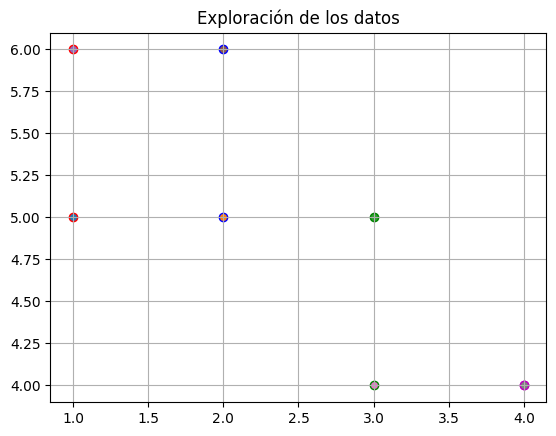

In [270]:
#Una exploración de como podrían quedar los datos
plt.scatter(1,5,edgecolors='r')
plt.scatter(2,5,edgecolors='b')
plt.scatter(3,5,edgecolors='g')
plt.scatter(4,4,edgecolors='m')


plt.scatter(1,6,edgecolors='r')
plt.scatter(2,6,edgecolors='b')
plt.scatter(3,4,edgecolors='g')
plt.scatter(4,4,edgecolors='m')
plt.title('Exploración de los datos')
plt.grid()
plt.show()

In [271]:
new_df2.head(1)

,0,Año,Trimestre,Departamento,Municipio,Accesos_fijos_internet,Población,Índice_penetración_internet
0,2021,2021,3,BOYACA,CIENEGA,233,4688,"0,0497"


In [272]:
#realizar las operaciones de conversión faltantes

#convertir el departamento
print(pro_[1], pro[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.] CUNDINAMARCA


In [273]:
print('Tamaño del vector codificado',len(pro_))
print('Tamaño de la columna operador', len(new_df2['Departamento']))

Tamaño del vector codificado 1000
Tamaño de la columna operador 1000


In [274]:
#se revisa el vector
vec=pro_[0]
print(vec)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [275]:
print('Numero a convertir', vec)
cont=len(vec)-1
for i in vec:
  if i==1:
    num=pow(2,cont)
  else:
    cont-=1
print('Numero convertido',num)

Numero a convertir [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Numero convertido 67108864


In [276]:
print(pow(2,8))


256


In [277]:
#Crear una función para la conversion
def bin2dec(v):
  '''Esta función recibe como parametro el vector con la codificación del operador '''
  cont=len(v)-1
  for i in v:
    if i==1:
      num=pow(2,cont)
    else:
      cont-=1
  return num



In [278]:
pro_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [279]:
#Se aplica la función
colv=[]
for i in pro_:
  colv.append(bin2dec(i))
print(colv)

[67108864, 262144, 2048, 32, 262144, 33554432, 512, 67108864, 512, 262144, 4294967296, 2, 16, 67108864, 134217728, 32, 262144, 4294967296, 4096, 67108864, 4294967296, 1024, 67108864, 4096, 32768, 262144, 33554432, 67108864, 67108864, 32768, 131072, 8, 32, 4096, 4294967296, 67108864, 67108864, 4096, 67108864, 67108864, 67108864, 67108864, 67108864, 16, 32768, 2147483648, 4, 67108864, 67108864, 67108864, 67108864, 67108864, 2, 1024, 67108864, 262144, 65536, 1024, 16777216, 65536, 67108864, 2048, 67108864, 4194304, 67108864, 1024, 1024, 67108864, 32768, 2048, 16777216, 1, 4096, 2048, 262144, 2147483648, 67108864, 2, 67108864, 4194304, 262144, 32768, 2048, 262144, 2147483648, 32, 2048, 32, 131072, 262144, 1, 262144, 16, 262144, 65536, 262144, 2, 4194304, 65536, 2048, 2048, 1, 4, 1024, 67108864, 4194304, 262144, 67108864, 131072, 4294967296, 262144, 262144, 2147483648, 67108864, 2048, 32, 262144, 32, 67108864, 4096, 134217728, 262144, 67108864, 64, 4294967296, 32, 131072, 2048, 65536, 13107

In [280]:
#Se crea el arreglo para el nuevo data_Frame
depart=np.array(colv)


In [281]:
new_df2['Departamento']=depar
new_df2

,0,Año,Trimestre,Departamento,Municipio,Accesos_fijos_internet,Población,Índice_penetración_internet
0,2021,2021,3,BOYACA,CIENEGA,233,4688,"0,0497"
1,2020,2020,4,CUNDINAMARCA,SUESCA,1313,18741,"0,0701"
2,2021,2021,3,NARI�O,ANCUYA,20,8601,"0,0023"
3,2021,2021,3,SANTANDER,SAN ANDRES,38,8691,"0,0044"
4,2021,2021,1,CUNDINAMARCA,ANOLAIMA,909,15156,"0,06"
...,...,...,...,...,...,...,...,...
995,2021,2021,4,HUILA,ACEVEDO,2932,25510,"0,1149"
996,2021,2021,4,VALLE DEL CAUCA,ANSERMANUEVO,1789,17409,"0,1028"
997,2021,2021,4,ANTIOQUIA,PUERTO NARE,1130,14664,"0,0771"
998,2021,2021,4,SANTANDER,GALAN,10,2923,"0,0034"


In [282]:
#Borrar la columna departamento y municipio
del(new_df2['Departamento'])
del(new_df2['Año'])
del(new_df2['Municipio'])
new_df2

,0,Trimestre,Accesos_fijos_internet,Población,Índice_penetración_internet
0,2021,3,233,4688,"0,0497"
1,2020,4,1313,18741,"0,0701"
2,2021,3,20,8601,"0,0023"
3,2021,3,38,8691,"0,0044"
4,2021,1,909,15156,"0,06"
...,...,...,...,...,...
995,2021,4,2932,25510,"0,1149"
996,2021,4,1789,17409,"0,1028"
997,2021,4,1130,14664,"0,0771"
998,2021,4,10,2923,"0,0034"


In [283]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   0                            1000 non-null   int64 
 1   Trimestre                    1000 non-null   int64 
 2   Accesos_fijos_internet       1000 non-null   object
 3   Población                    1000 non-null   object
 4   Índice_penetración_internet  1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [284]:
#se revisa la forma de hacer la conversión de la columna accesos fijos a internet
ace_i=list(new_df2['Accesos_fijos_internet'])
num=int(ace_i[0])
print(num, type(num))

233 <class 'int'>


In [285]:
can=[]
for i in ace_i:
  num=int(i)
  can.append(num)

Ace_i=np.array(can)
new_df2['Ace_i']=Ace_i
del(new_df2['Accesos_fijos_internet'])
new_df2.head()


,0,Trimestre,Población,Índice_penetración_internet,Ace_i
0,2021,3,4688,"0,0497",233
1,2020,4,18741,"0,0701",1313
2,2021,3,8601,"0,0023",20
3,2021,3,8691,"0,0044",38
4,2021,1,15156,"0,06",909


In [286]:
#se revisa la forma de hacer la conversión de la columna polacion
pob=list(new_df2['Población'])
num=int(pob[0])
print(num, type(num))

4688 <class 'int'>


In [287]:
can=[]
for i in pob:
  num=int(i)
  can.append(num)

Pob=np.array(can)
new_df2['Pob']=Pob
del(new_df2['Población'])
new_df2.head()

,0,Trimestre,Índice_penetración_internet,Ace_i,Pob
0,2021,3,"0,0497",233,4688
1,2020,4,"0,0701",1313,18741
2,2021,3,"0,0023",20,8601
3,2021,3,"0,0044",38,8691
4,2021,1,"0,06",909,15156


In [288]:
valores_lista =list(new_df2['Índice_penetración_internet'])

valores_float = []
for valor in valores_lista:
    valor_float = float(valor.replace(',', '.'))
    valores_float.append(valor_float)

print(valores_float)

[0.0497, 0.0701, 0.0023, 0.0044, 0.06, 0.1285, 0.0127, 0.0196, 0.0073, 0.1331, 0.0005, 0.0028, 0.0152, 0.0202, 0.0489, 0.0351, 0.2779, 0.0019, 0.0112, 0.0151, 0.0003, 0.17, 0.0215, 0.0038, 0.1009, 0.1159, 0.145, 0.0073, 0.0028, 0.0281, 0.0121, 0.0104, 0.0459, 0.002, 0.0033, 0.0196, 0.0409, 0.0275, 0.0037, 0.0062, 0.0964, 0.0236, 0.0884, 0.0004, 0.0091, 0.0936, 0.2398, 0.061, 0.0372, 0.0285, 0.0113, 0.0673, 0.0006, 0.1683, 0.0879, 0.0476, 0.0333, 0.0313, 0.0431, 0.0103, 0.011, 0.0059, 0.0212, 0.1747, 0.0059, 0.0229, 0.1486, 0.0069, 0.016, 0.0257, 0.0007, 0.0005, 0.0034, 0.0442, 0.263, 0.097, 0.0443, 0.0013, 0.0937, 0.0015, 0.0139, 0.0565, 0.0101, 0.0909, 0.0797, 0.0052, 0.0284, 0.1968, 0.003, 0.2051, 0.0022, 0.1089, 0.0332, 0.2113, 0.0249, 0.2515, 0.0009, 0.0011, 0.0304, 0.0339, 0.0089, 0.0652, 0.1741, 0.0403, 0.0206, 0.0006, 0.1383, 0.0631, 0.008, 0.0053, 0.2485, 0.0103, 0.1227, 0.0025, 0.0171, 0.0356, 0.2665, 0.016, 0.0197, 0.0036, 0.0345, 0.0046, 0.0766, 0.075, 0.0233, 0.1115, 0.001,

In [289]:
#se revisa la forma de hacer la conversión de la columna Índice_penetración_internet
pen_i=valores_float
num=float(pen_i[0])
print(num, type(num))

0.0497 <class 'float'>


In [290]:
can=[]
for i in pen_i:
  num=float(i)
  can.append(num)

Pen_i=np.array(can)
new_df2['Pen_i']=Pen_i
del(new_df2['Índice_penetración_internet'])
new_df2.head()

,0,Trimestre,Ace_i,Pob,Pen_i
0,2021,3,233,4688,0.0497
1,2020,4,1313,18741,0.0701
2,2021,3,20,8601,0.0023
3,2021,3,38,8691,0.0044
4,2021,1,909,15156,0.0600


In [291]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          1000 non-null   int64  
 1   Trimestre  1000 non-null   int64  
 2   Ace_i      1000 non-null   int64  
 3   Pob        1000 non-null   int64  
 4   Pen_i      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [292]:
#Renombrar la columa 0 como perido
new_df2=new_df2.rename(columns={0:'Peri'})
new_df2

,Peri,Trimestre,Ace_i,Pob,Pen_i
0,2021,3,233,4688,0.0497
1,2020,4,1313,18741,0.0701
2,2021,3,20,8601,0.0023
3,2021,3,38,8691,0.0044
4,2021,1,909,15156,0.0600
...,...,...,...,...,...
995,2021,4,2932,25510,0.1149
996,2021,4,1789,17409,0.1028
997,2021,4,1130,14664,0.0771
998,2021,4,10,2923,0.0034


In [293]:
#Aplicar el modelo de agrupamiento
#Colocar los datos de entrada
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4,max_iter=300)
Kmeans.fit(new_df2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [294]:
objetivos=Kmeans.fit_predict(new_df2)
print(objetivos)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


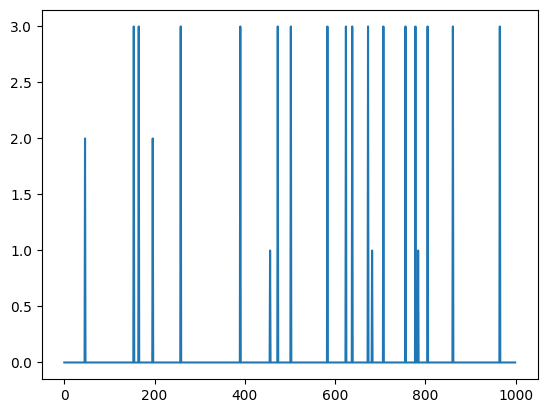

In [295]:
plt.plot(objetivos)
plt.show()

In [296]:
#Anilizar los resultados de la agrupación
print(type(objetivos))
print(len(objetivos))
arr_=objetivos
print(type(arr_))
print(len(arr_))

<class 'numpy.ndarray'>
1000
<class 'numpy.ndarray'>
1000


In [297]:
arr_o=np.sort(arr_)
print(arr_o)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

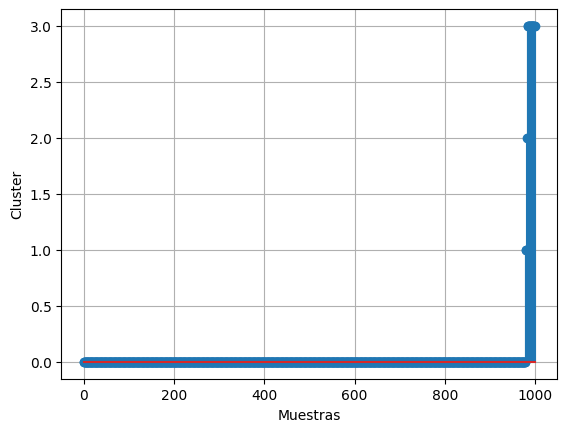

In [298]:
#Tipos de graficas para los resultados de la agrupación
plt.stem(arr_o)
plt.grid()
plt.xlabel('Muestras')
plt.ylabel('Cluster')
plt.show()

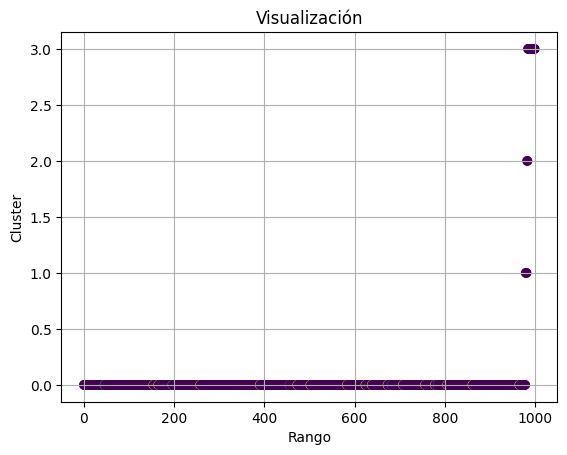

In [299]:
#Realizar una grafica de dos dimensiones para el agrupamiento
rango=range(0,len(arr_o))
plt.scatter(rango,arr_o,c=Kmeans.labels_)
plt.xlabel('Rango')
plt.ylabel('Cluster')
plt.title('Visualización')
plt.grid()
plt.show()

En general la agrupación es buena

In [300]:
new_df2.head(1)

,Peri,Trimestre,Ace_i,Pob,Pen_i
0,2021,3,233,4688,0.0497


In [301]:
datos_=new_df2[['Ace_i']]
datos_['Pen_i']=new_df2['Pen_i']
datos_

<ipython-input-301-979aaa9e0c52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_['Pen_i']=new_df2['Pen_i']


,Ace_i,Pen_i
0,233,0.0497
1,1313,0.0701
2,20,0.0023
3,38,0.0044
4,909,0.0600
...,...,...
995,2932,0.1149
996,1789,0.1028
997,1130,0.0771
998,10,0.0034


In [302]:
#Modelo usando BDSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(datos_)


DBSCAN(eps=0.05)

In [303]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1, -1, -1, -1, -1, -1,
       -1,  2, -1,  3, -1, -1,  4, -1, -1, -1,  5,  6, -1,  7, -1, -1,  8,
       -1, -1, -1, -1,  9,  1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, 10,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1, -1, 11,
       -1, -1, 10, 12, 13, -1, -1, -1, -1, -1, -1, 14, 15, -1, -1, -1, -1,
       16, -1, -1, 17, -1,  8, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,
       -1, -1, -1, 18, -1, -1,  2,  8, -1, -1, -1, 17, -1, -1, -1, -1, -1,
        5, -1, 19, -1, -1, -1, -1,  3, -1, -1,  9, -1, -1, -1, -1, -1, -1,
        2, -1,  6, -1, 17,  1, -1, -1, -1, -1, -1, -1, -1, -1, 11, -1, -1,
        2, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, 17, -1, -1,
        1, -1,  7, -1, -1, 20, 21, -1, -1, -1,  4, 14, -1, 11, -1, -1, -1,
       -1, -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1,  5,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, 17, -1, -1, 22, -1, -1, -1,
       -1, -1,  2, -1, -1